#### Problem Statement:
Predicting Movie Success on Netflix-like Streaming Platforms

#### Business Context:
Objective:
Use historical movie and content data to predict whether a movie will be successful on a streaming platform. This model has immense value for:

🎬 Content Acquisition & Investment: Decide which films or series to acquire or produce.

📈 Marketing Strategy: Allocate budgets more effectively toward promising content.

🧠 User Engagement Optimization: Prioritize showing high-likelihood success content to users.

💰 Revenue Forecasting: Estimate ROI from different genres/languages and viewer segments.

#### Project Objective:
Your objective is to develop a predictive model that classifies whether a movie will be "successful" based on its metadata (e.g., genre, language, popularity metrics, vote count, etc.).

* Exploratory Data Analysis (EDA):
 
 * Understand dataset structure and feature distributions.

 * Identify patterns related to success — genre trends, vote behavior, popularity spikes.

 * Detect and treat missing values, outliers, or skewed data.

 * Visualize how various features like genre, language, and popularity relate to success.

* Classification Task:
  * Problem: Predict whether a movie will be successful (binary classification: Success = 1 / 0).

  * Goal: Build classification models like Logistic Regression, Decision Trees, Random Forest, XGBoost, etc.

  * Evaluate their performance in identifying successful titles using model metrics.

*  Regression Task (Optional / Extended):
  * Problem: Predict Vote_Average or Popularity as continuous success indicators.

  Goal: Use regression models (e.g., Linear Regression, Random Forest Regressor) to forecast engagement metrics.

4. 🧪 Model Evaluation:
Classification Metrics: Accuracy, Precision, Recall, F1-Score, Confusion Matrix.

Regression Metrics (if applicable): MAE, RMSE, R².

Include baseline models and assess performance improvements using cross-validation and tuning.

5. 🚀 Model Deployment (Optional):
Deploy best-performing model using Flask or Streamlit.

Build a simple web app where Netflix staff can input content info (genre, votes, etc.) and get a success prediction in real-time.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\movie_classification_dataset.csv")

In [3]:
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Success
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",1
1,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller",1
2,No Exit,2618.087,122,6.3,en,Thriller,0
3,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",1
4,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9826 entries, 0 to 9825
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              9826 non-null   object 
 1   Popularity         9826 non-null   float64
 2   Vote_Count         9826 non-null   int64  
 3   Vote_Average       9826 non-null   float64
 4   Original_Language  9826 non-null   object 
 5   Genre              9826 non-null   object 
 6   Success            9826 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 537.5+ KB


In [5]:
df.describe()


,Popularity,Vote_Count,Vote_Average,Success
count,9826.000000,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467,0.328313
std,108.879332,2611.303856,1.129797,0.469623
min,13.354000,0.000000,0.000000,0.000000
25%,16.128250,146.000000,5.900000,0.000000
50%,21.195000,444.000000,6.500000,0.000000
75%,35.179250,1376.000000,7.100000,1.000000
max,5083.954000,31077.000000,10.000000,1.000000


In [6]:
df.shape

(9826, 7)

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Original_Language', 'Genre', 'Success'],
      dtype='object')

In [9]:
df[df.duplicated()]

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Success


In [10]:
df.isnull().sum()


Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Success              0
dtype: int64

In [11]:
df['Genre'] = df['Genre'].str.split(', ')    #explode - transform a column of list into multiple rows
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Success
0,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action,1
1,Spider-Man: No Way Home,5083.954,8940,8.3,en,Adventure,1
2,Spider-Man: No Way Home,5083.954,8940,8.3,en,Science Fiction,1
3,The Batman,3827.658,1151,8.1,en,Crime,1
4,The Batman,3827.658,1151,8.1,en,Mystery,1


#### Observations
* There are no null or duplicarted data entries
  

#### Outliner Analysis

In [14]:
print(df.dtypes)


Title                 object
Popularity           float64
Vote_Count             int64
Vote_Average         float64
Original_Language     object
Genre                 object
Success                int64
dtype: object


In [15]:
cat_variables= df.select_dtypes(['object'])
cat_variables = cat_variables.drop(columns=['Title'], errors='ignore')
num_variables= df.select_dtypes(['int','float'])

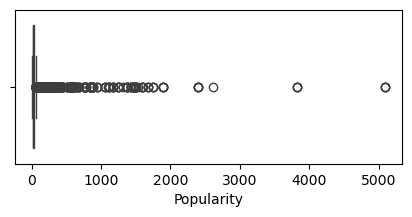

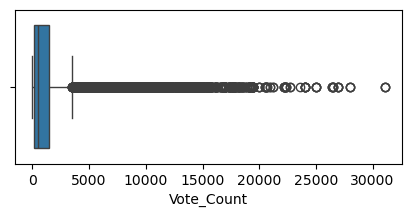

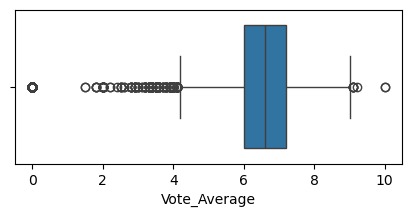

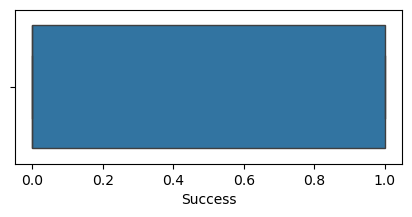

In [16]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


In [17]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  Popularity : 2778
-----------------------
Number of ouliers in  Vote_Count : 2985
-----------------------
Number of ouliers in  Vote_Average : 8
-----------------------
Number of ouliers in  Success : 0
-----------------------


#### Observations
* There are many outliners in the data
* 1047 outliners in Popularity
* 1129 Outliners in Vote_Count
* 11 Outliners in Vote_Avg

In [19]:
print(cat_variables.columns)

Index(['Original_Language', 'Genre'], dtype='object')


#### UniVariate Analysis

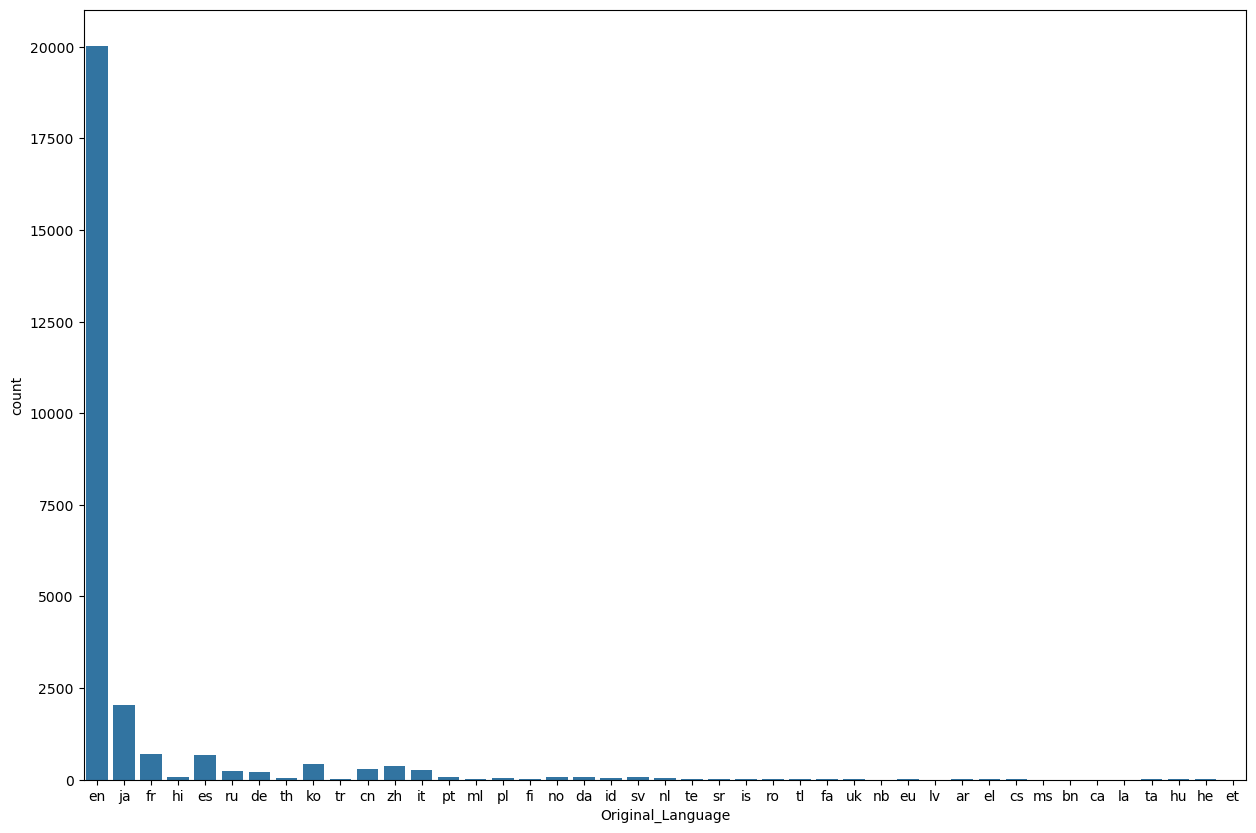

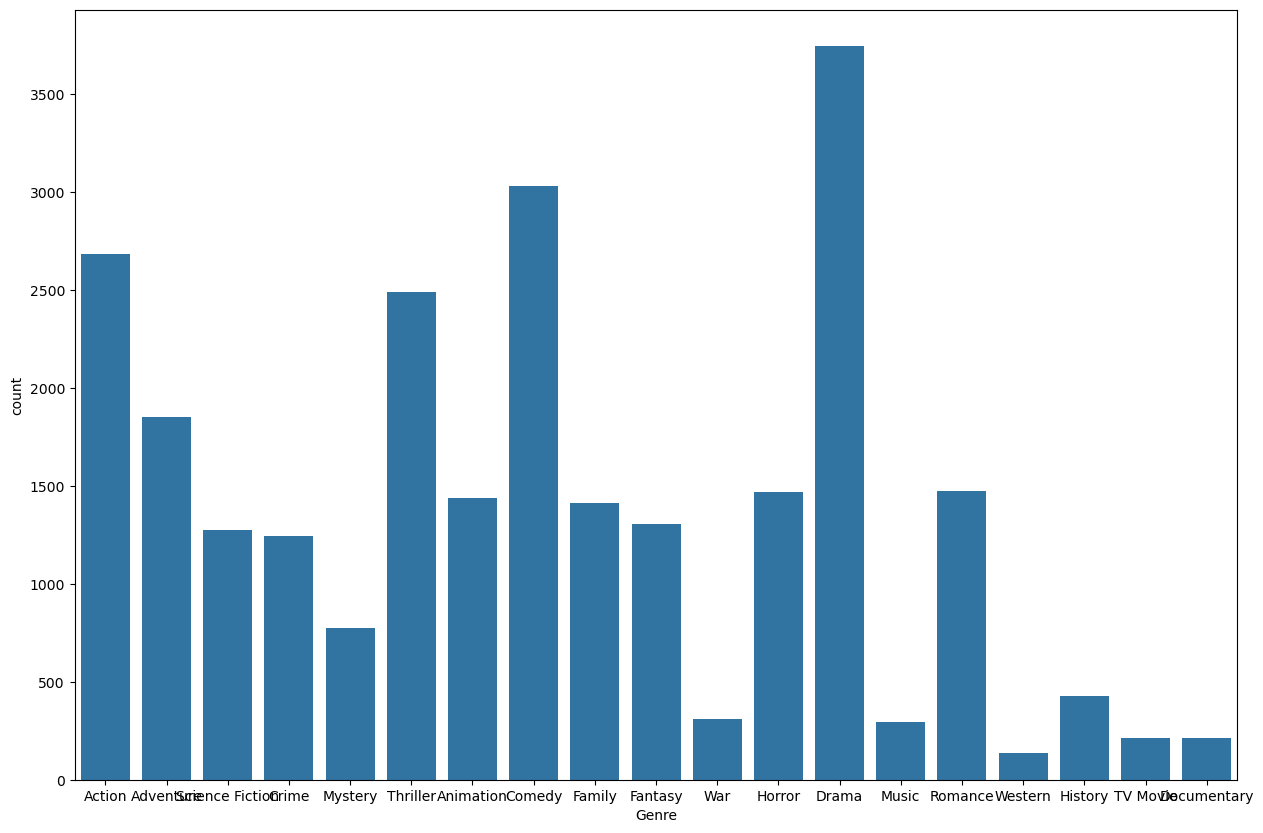

In [21]:
for i in cat_variables:
    plt.figure(figsize=(15,10))
    sns.countplot(data=df, x=i)
    plt.show()
    plt.close()


In [22]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

43
Original_Language
en    20018
ja     2025
fr      692
es      659
ko      420
zh      364
cn      299
it      251
ru      229
de      198
pt       72
da       63
no       62
hi       61
sv       58
nl       46
th       45
pl       37
id       35
tr       27
te       15
tl       13
sr       13
fi       12
el        9
cs        8
hu        8
uk        7
is        6
fa        6
ta        5
ro        4
he        4
ar        4
ml        3
eu        3
nb        2
bn        2
ms        2
et        2
ca        1
la        1
lv        1
Name: count, dtype: int64
-------------
19
Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Mov

#### Observations
* In comparison English as the original Lang is significantly more than the others
* Common Genres like Horror, Drama ,Action, Adventure are more common

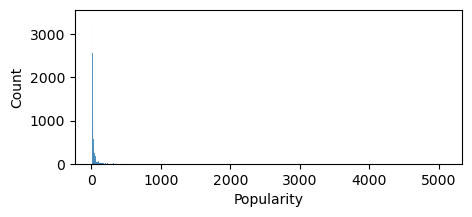

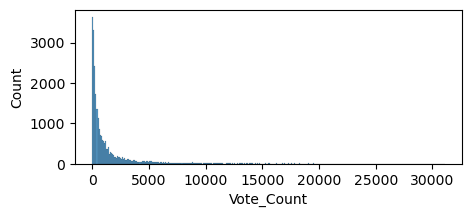

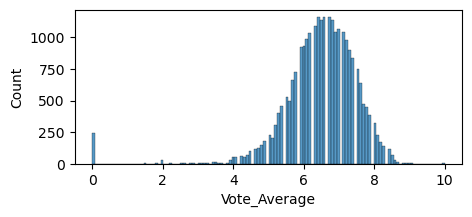

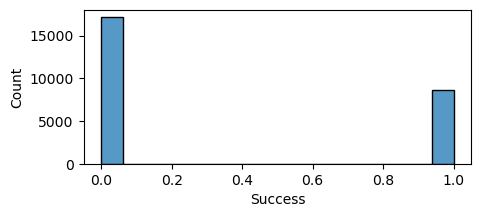

In [24]:
 for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i);
    plt.show()
    plt.close()

#### Observations
* 

#### Bi-Variate Analysis

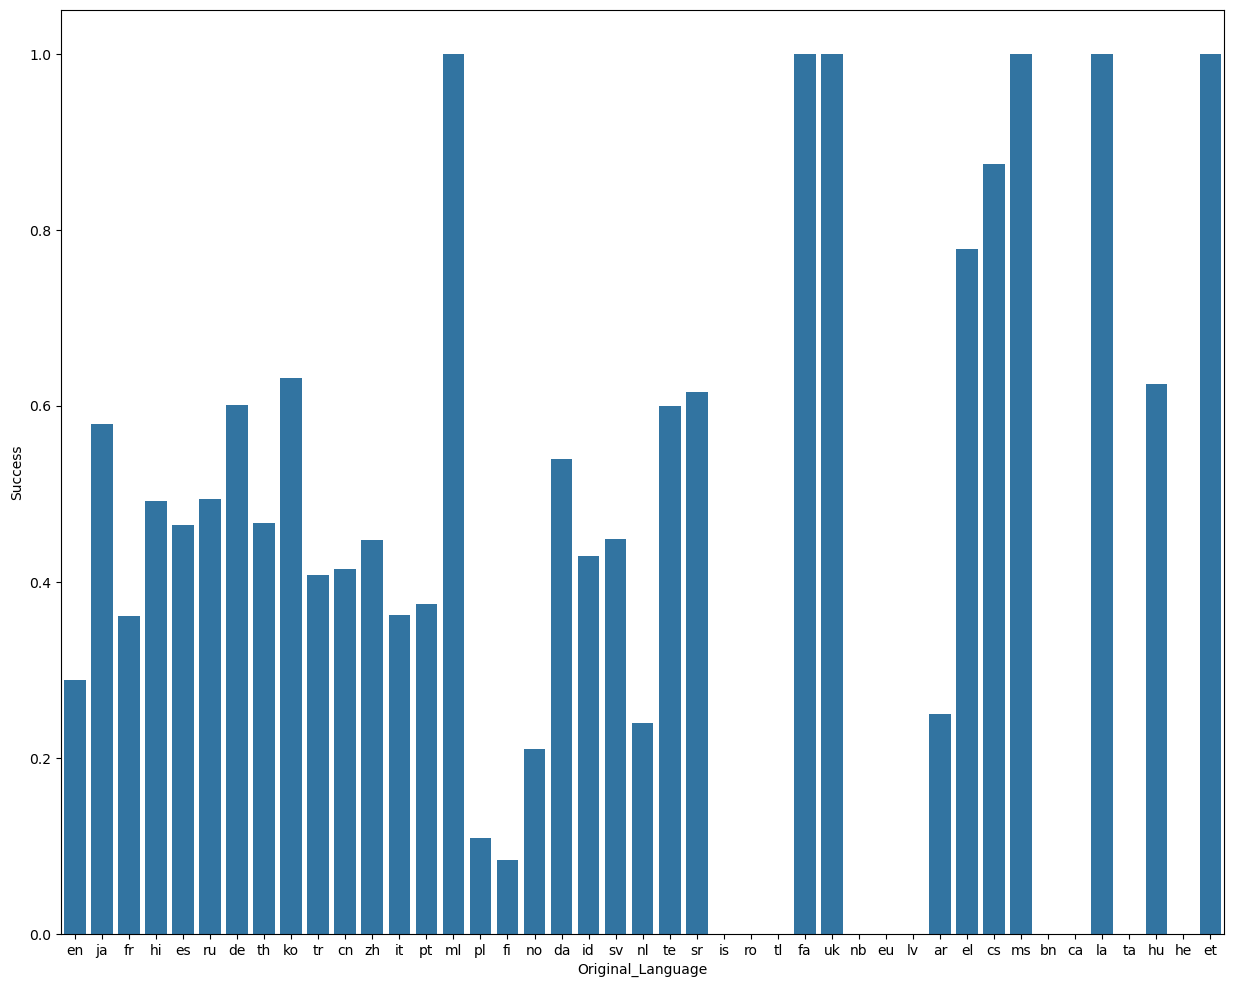

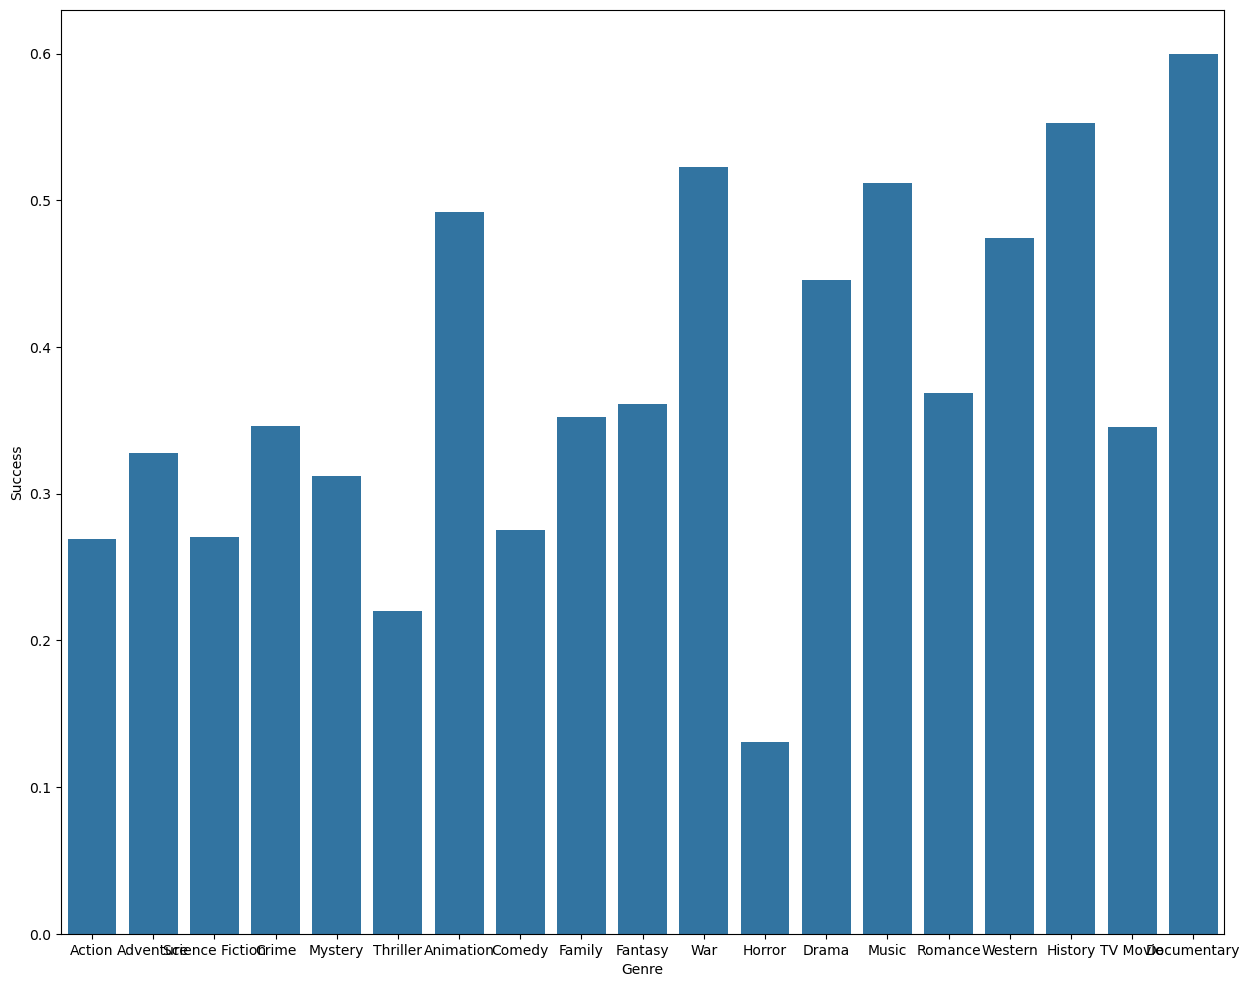

In [27]:
for i in cat_variables.columns:
    plt.figure(figsize=(15,12))
    sns.barplot(data=df, y='Success',x=i,errorbar=None);

#### Observations

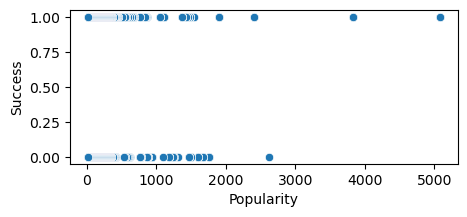

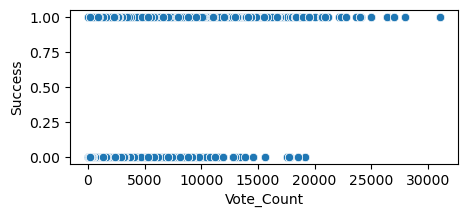

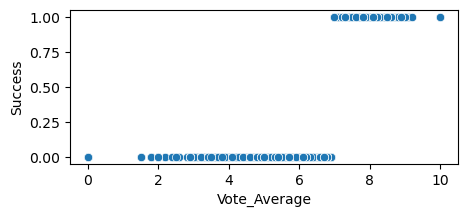

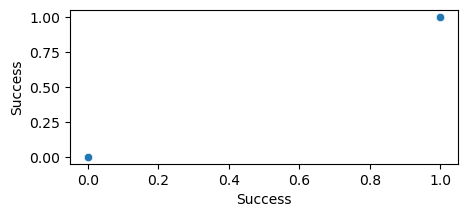

In [29]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='Success',x=i);

#### observations

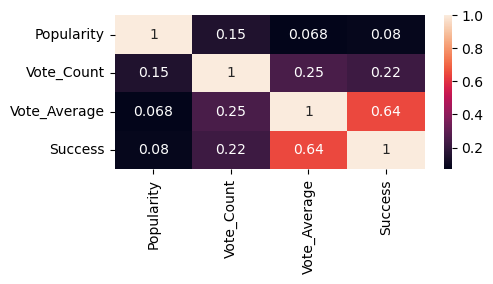

In [31]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

#### ObserVations
* Only relations which are significant with success is Vote_Average

# 3- Data Cleaning & pre processing
* 0.Dropping unwanted columns
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods

In [34]:
#### Dropping Title from the dataset as its unwanted
df.drop('Title', axis=1, inplace=True)

In [35]:
df.isnull().sum()

Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Success              0
dtype: int64

#### Observations
No wrong entries , duplicates or missing values

In [37]:
#### Outliner Treament
df['Popularity'] = np.log1p(df['Popularity'])
df['Vote_Count'] = np.log1p(df['Vote_Count'])

#### Encoding

In [39]:
print(df['Genre'].nunique())
print(df['Original_Language'].nunique())

19
43


In [40]:


from sklearn.preprocessing import LabelEncoder

# Make a copy of original DataFrame
df_encoded = df.copy()

# Encode Genre
le_genre = LabelEncoder()
df_encoded['Genre'] = le_genre.fit_transform(df_encoded['Genre'])

# Encode Language
le_lang = LabelEncoder()
df_encoded['Original_Language'] = le_lang.fit_transform(df_encoded['Original_Language'])

In [41]:
df_encoded.head()

,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Success
0,8.534041,9.098403,8.3,8,0,1
1,8.534041,9.098403,8.3,8,1,1
2,8.534041,9.098403,8.3,8,14,1
3,8.250270,7.049255,8.1,8,4,1
4,8.250270,7.049255,8.1,8,12,1


##  Train Test Split (Required when building model for predictions)

In [76]:
df_TrainTestSplit = df_encoded.copy()


In [78]:
df_TrainTestSplit.head()

,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Success
0,8.534041,9.098403,8.3,8,0,1
1,8.534041,9.098403,8.3,8,1,1
2,8.534041,9.098403,8.3,8,14,1
3,8.250270,7.049255,8.1,8,4,1
4,8.250270,7.049255,8.1,8,12,1


In [80]:
X = df_TrainTestSplit.drop('Success', axis=1)  
y = df_TrainTestSplit['Success']              


In [82]:
X.head()

,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,8.534041,9.098403,8.3,8,0
1,8.534041,9.098403,8.3,8,1
2,8.534041,9.098403,8.3,8,14
3,8.250270,7.049255,8.1,8,4
4,8.250270,7.049255,8.1,8,12


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)    

In [86]:
X_train.head()

,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
16558,2.959587,6.318968,6.3,33,8
7366,3.531026,3.871201,6.7,21,6
23858,2.715026,6.594413,7.5,8,16
4537,3.887710,6.352629,7.2,8,2
5156,3.792293,8.406708,7.4,8,9


In [88]:
y

0        1
1        1
2        1
3        1
4        1
        ..
25787    0
25788    0
25789    1
25790    1
25791    1
Name: Success, Length: 25792, dtype: int64

## Scaling

In [91]:
X_train.columns

Index(['Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language',
       'Genre'],
      dtype='object')

In [93]:
num_cols = ['Popularity', 'Vote_Count', 'Vote_Average']

cat_cols = ['Original_Language','Genre']

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Define features and target
X = df_encoded.drop('Success', axis=1)
y = df_encoded['Success']

# Step 2: Train-validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Step 3: Define numerical and categorical columns
num_cols = ['Popularity', 'Vote_Count', 'Vote_Average']
cat_cols = ['Genre', 'Original_Language']  # Updated here

# Step 4: Z-score scaling for numerical columns
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

Xtrain_scaled_num = pd.DataFrame(scaler.transform(X_train[num_cols]), columns=num_cols)
Xval_scaled_num = pd.DataFrame(scaler.transform(X_val[num_cols]), columns=num_cols)

# Step 5: Combine scaled numeric with unscaled categorical features
scaled_train = pd.concat([Xtrain_scaled_num.reset_index(drop=True), X_train[cat_cols].reset_index(drop=True)], axis=1)
scaled_val = pd.concat([Xval_scaled_num.reset_index(drop=True), X_val[cat_cols].reset_index(drop=True)], axis=1)


In [216]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Popularity,Vote_Count,Vote_Average
count,20633.00,20633.00,20633.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-0.99,-3.57,-6.00
25%,-0.72,-0.59,-0.44
50%,-0.32,0.03,0.11
75%,0.41,0.68,0.67
max,7.57,2.44,3.26


In [218]:
X_train[num_cols].head(2)

,Popularity,Vote_Count,Vote_Average
16010,2.980720,7.013016,7.5
9139,3.366847,0.000000,0.0


In [220]:
Xtrain_scaled_StandardScalar.head()

,Popularity,Vote_Count,Vote_Average
0,-0.562055,0.100459,-0.163049
1,0.271546,-1.320762,0.207457
2,-0.918814,0.260388,0.948470
3,0.791866,0.120004,0.670590
4,0.652675,1.312642,0.855843


In [222]:
Xtrain_scaled_StandardScalar.shape

(20633, 3)

In [224]:
X_train[cat_cols].shape

(20633, 2)

In [226]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Only fit on training data!
scaler.fit(X_train[num_cols])

# Then transform both
Xtrain_scaled_StandardScalar = scaler.transform(X_train[num_cols])
Xval_scaled_StandardScalar = scaler.transform(X_val[num_cols])


In [228]:
Xtrain_scaled_StandardScalar = pd.DataFrame(
    Xtrain_scaled_StandardScalar,
    columns=X_train[num_cols].columns
)


In [230]:
round(Xtrain_scaled_StandardScalar.describe(), 2)



,Popularity,Vote_Count,Vote_Average
count,20633.00,20633.00,20633.00
mean,-0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-1.00,-3.56,-5.97
25%,-0.72,-0.59,-0.44
50%,-0.32,0.03,0.11
75%,0.40,0.68,0.67
max,7.56,2.43,3.25


In [232]:
X_train[cat_cols].reset_index(drop=True)

,Genre,Original_Language
0,10,8
1,1,8
2,9,8
3,6,8
4,13,8
...,...,...
20628,1,21
20629,7,8
20630,1,8
20631,13,21


In [267]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

## Model Building

In [239]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#pip install xgboost
from xgboost import XGBClassifier

In [258]:

# KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can lower this for more variability

knn.fit(scaled_train, y_train)

y_train_pred = knn.predict(scaled_train)
y_val_pred = knn.predict(scaled_val)

# Evaluation
acc_train = accuracy_score(y_train, y_train_pred)
acc_val = accuracy_score(y_val, y_val_pred)
prec = precision_score(y_val, y_val_pred, zero_division=0)
rec = recall_score(y_val, y_val_pred, zero_division=0)
f1 = f1_score(y_val, y_val_pred, zero_division=0)

# Print results
print(f"Train Accuracy:  {acc_train:.3f}")
print(f"Val Accuracy:    {acc_val:.3f}")
print(f"Precision:       {prec:.3f}")
print(f"Recall:          {rec:.3f}")
print(f"F1 Score:        {f1:.3f}")


Train Accuracy:  0.982
Val Accuracy:    0.955
Precision:       0.943
Recall:          0.923
F1 Score:        0.933


📊 Classification Report:
                precision    recall  f1-score   support

Not Successful       0.96      0.97      0.97      3433
    Successful       0.94      0.92      0.93      1726

      accuracy                           0.96      5159
     macro avg       0.95      0.95      0.95      5159
  weighted avg       0.96      0.96      0.96      5159



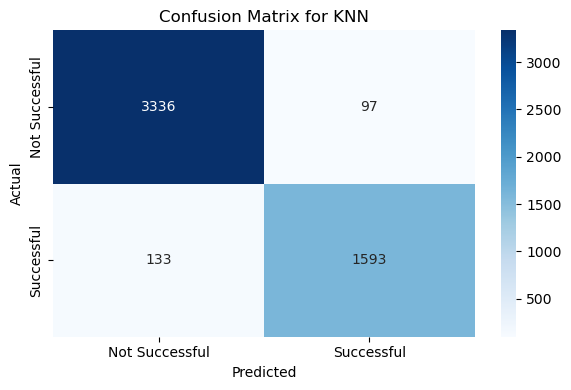

In [261]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict using your KNN model
y_val_pred = knn.predict(scaled_val)

# Classification Report
print("📊 Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=["Not Successful", "Successful"]))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Not Successful", "Successful"],
            yticklabels=["Not Successful", "Successful"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for KNN")
plt.tight_layout()
plt.show()


In [265]:
from sklearn.metrics import accuracy_score

# Accuracy score (0.0 to 1.0)
acc = accuracy_score(y_val, y_val_pred)

# Display as percentage
print(f"✅ Accuracy: {acc * 100:.2f}%")


✅ Accuracy: 95.54%
